# PCA exercise

In [1]:
import numpy as np

This creates a dataset of 200 data points. 

In [2]:
np.random.seed(1976)
A = np.random.random(size=(7,7))
cov = np.dot(A.T,A)
X = np.random.multivariate_normal(np.zeros(7),cov, size=200)

av = np.average(X,axis=0)
std = np.std(X, axis=0)

Xnorm = (X-av)/std 

## task 1

Use PCA to determine how many dimensions you need to keep to maintain 95% of the variance. 

Predict the variance of the reduced set and calculate it explicitely.  

These are the fraction of explained variance:

[]
[[-0.22672849]
 [ 1.45611279]
 [ 1.76252416]
 [ 0.6715977 ]
 [ 3.65796137]
 [-2.97792265]
 [-1.73742134]
 [-1.24920355]
 [-2.08488316]
 [-1.36335928]
 [-0.66737012]
 [ 0.38980845]
 [ 2.16013474]
 [-0.49792883]
 [-1.03878832]
 [ 2.60236303]
 [ 2.06245095]
 [ 1.11965141]
 [-2.47746093]
 [ 1.23809743]
 [-2.18308151]
 [-2.02150837]
 [-1.62347789]
 [-1.946522  ]
 [ 5.0586754 ]
 [-3.27505222]
 [-0.14086198]
 [ 0.73174843]
 [-0.81737441]
 [-0.49044381]
 [-2.1082171 ]
 [ 2.72790976]
 [ 0.62275624]
 [ 2.55037514]
 [ 2.23853198]
 [-0.13085679]
 [-2.53130362]
 [ 1.83494715]
 [ 4.27577318]
 [ 2.22591834]
 [-2.4755948 ]
 [-5.45355067]
 [-1.67372813]
 [ 4.45072027]
 [ 2.8604185 ]
 [ 0.65944924]
 [ 0.06507121]
 [ 1.95065198]
 [ 3.98757879]
 [-1.00444478]
 [ 0.19066169]
 [-1.01287195]
 [-0.98397213]
 [-1.11973035]
 [-1.03580409]
 [-5.33721439]
 [-2.878404  ]
 [ 1.13513711]
 [ 2.00209727]
 [ 3.03079678]
 [ 1.39069235]
 [-0.92822962]
 [-3.10853061]
 [-1.94628094]
 [-0.887626  ]
 [ 1.0344087 ]
 [ 0.55

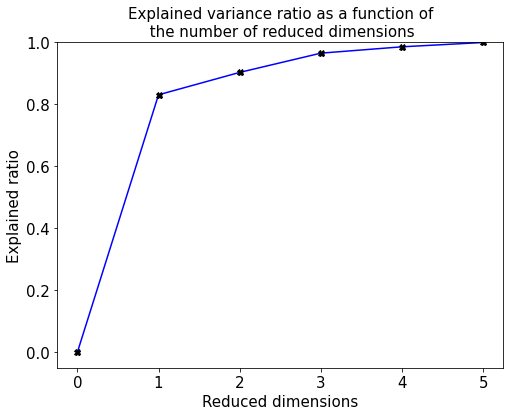

Ratios =  [0, 0.8288730554826004, 0.900963544174255, 0.9629223140906894, 0.9833737248047157, 0.9972692272952041]


[0,
 0.8288730554826004,
 0.900963544174255,
 0.9629223140906894,
 0.9833737248047157,
 0.9972692272952041]

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# YOUR CODE HERE
from matplotlib.pyplot import figure

def calculate_fractions(X):
    # YOUR CODE HERE
    fractions = []
    dim = []
    for i in [0,1,2,3,4,5]:
        
        pca = PCA(n_components=i)
        pca.fit_transform(X)
        print(pca.fit_transform(X))
        
        fraction = pca.explained_variance_ratio_
        fractions.append(sum(fraction))
        dim.append(i)
        
    figure(figsize=(8, 6))
    plt.plot(dim,fractions, color = 'blue', marker = "X", markerfacecolor = "black", markeredgecolor = "black")
    plt.ylabel('Explained ratio', fontsize=15)
    plt.xlabel('Reduced dimensions', fontsize=15)
    plt.title("Explained variance ratio as a function of\n the number of reduced dimensions", fontsize=15)
    plt.ylim(-.05,1)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()
    print("Ratios = ",fractions)
    return(fractions)


###################### check wich data set to do ###################################
calculate_fractions(Xnorm)


In [3]:
u,s,vt = np.linalg.svd(Xnorm)   # svd returns v transposed
# cummulatively sum up the squares of the elements on the diagonal
cs = np.cumsum(s**2)
# fractions given as entry of total sum (=last entry)
fractions = cs/cs[-1]
fractions

array([0.82887306, 0.90096354, 0.96292231, 0.98337372, 0.99726923,
       0.99913066, 1.        ])

So to retain 95% of the variance we only need the first 3 eignevectors. The transformation is given by: 

In [4]:
S3 = vt.T[:,:3]

Applying it to the dataset we get the reduced dataset:

In [5]:
reduced = np.dot(Xnorm,S3)
print(reduced[:10])

[[-0.22672849 -0.80162514 -0.29934808]
 [ 1.45611279 -0.41283112  0.03976126]
 [ 1.76252416 -1.40875441  1.25272327]
 [ 0.6715977  -0.02070658 -0.26998796]
 [ 3.65796137 -0.04003659  0.101945  ]
 [-2.97792265 -0.01416446  1.39810271]
 [-1.73742134  0.58024951  0.30197702]
 [-1.24920355  1.80188261  0.51016875]
 [-2.08488316 -1.36227415 -0.87514647]
 [-1.36335928  0.56289435  0.7037041 ]]


We can calculate the variance:

In [6]:
stdred = np.std(reduced,axis=0) 
stdred, np.cumsum(stdred**2)

(array([2.40875723, 0.71037555, 0.65856768]),
 array([5.80211139, 6.30674481, 6.7404562 ]))

We can see that it matches what we expect: we start with a variance of 7 and reduce it by the fractional variance we calculated above.

In [7]:
7 * fractions[2]

6.740456198634824